In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

### Načteme data

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
y_train.shape

(55000,)

In [10]:
X_test.shape

(10000, 28, 28)

Prozkoumáme obrázky

In [11]:
from matplotlib import pyplot as plt 

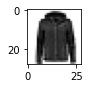

In [12]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap="binary")

Více obrázků viz prezentace

### Příprava vstupních dat

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Neuronové sítě využívají metodu Gradient Descent, proto je nutné, aby příznaky byly naškálované

In [14]:
pipeline = Pipeline([
        ('scaler', StandardScaler()),
])

In [15]:
X_train = X_train.reshape(-1, 28*28)

In [16]:
X_valid = X_valid.reshape(-1, 28*28)

In [17]:
X_test = X_test.reshape(-1, 28*28)

In [18]:
X_train.shape, X_valid.shape, X_test.shape

((55000, 784), (5000, 784), (10000, 784))

In [19]:
X_train = pipeline.fit_transform(X_train)

In [20]:
X_valid = pipeline.transform(X_valid)

In [21]:
X_test = pipeline.transform(X_test)

### Vytvoření modelu neuronové sítě

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=[28*28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Hustě propojené vrstvy mají hodně parametrů: dimenze vstupu (784) * počet neuronů ve vrstvě (300) + bias (300) + další vrstvy 


Hodně parametrů znamená hodně flexibility a také náklonnost k přeučení

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

"sparse_categorical_crossentropy" - používáme třídy označené 0-9 (pokud by byly třídy kódované jako one-hot vektory, tak bychom použili "categorical_crossentropy"



### Natrénování modelu

In [25]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7283 - accuracy: 0.7549 - val_loss: 0.4028 - val_accuracy: 0.8550
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3841 - accuracy: 0.8620 - val_loss: 0.3621 - val_accuracy: 0.8700
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3351 - accuracy: 0.8769 - val_loss: 0.3577 - val_accuracy: 0.8724
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2997 - accuracy: 0.8906 - val_loss: 0.3310 - val_accuracy: 0.8812
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.8993 - val_loss: 0.3248 - val_accuracy: 0.8830
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9066 - val_loss: 0.3154 - val_accuracy: 0.8872
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2462 - accuracy: 0.9110 - val_loss: 0.3144 - val_accuracy:

In [26]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

Zobrazíme si, jak se model vyvíjel po jednotlivých epochách

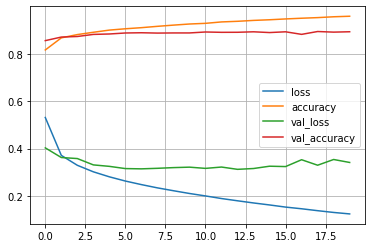

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.grid(True)

### Na závěr ověříme na testovacích datech

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8827


[0.370830774307251, 0.8827000260353088]

**Můžeme porovnat s jinými klasifikátory**

SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC(kernel="rbf")

In [31]:
svc.fit(X_train, y_train)

SVC()

In [32]:
svc.score(X_test, y_test)

0.8844

Logistická regrese

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

c:\program files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8415

### Predikce na nových datech

In [34]:
X_new = X_test[:3] 
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
        0.997],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [35]:
import numpy as np
np.argmax(y_proba, axis=1)

array([9, 2, 1], dtype=int64)

Ukázka řešení regrese viz prezentace a samostatný notebook.